# Conx

Neural network library in Python built on top of Theano.

In [ ]:
! pip install conx -U

In [1]:
import conx
conx.__version__

'1.0.2'

In [2]:
from conx import Network

In [3]:
net = Network(2, 2, 1)

In [4]:
net

Network:--------------------------------------------------
Layer 0:
    Type: <class 'conx.network.Layer'>
    Act : sigmoid
    In  : 2
    Out : 2
--------------------------------------------------
Layer 1:
    Type: <class 'conx.network.Layer'>
    Act : sigmoid
    In  : 2
    Out : 1
--------------------------------------------------

In [5]:
net.get_device()

'cpu'

Ok, now we are ready to train a neural network to perform the XOR function.

In [3]:
inputs = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

def xor(inputs):
    a = inputs[0]
    b = inputs[1]
    return [int((a or b) and not(a and b))]

net.set_inputs(inputs)
net.set_target_function(xor)

In [4]:
net.test()

--------------------------------------------------
Test:
Input: [0, 0]
Output: [ 0.57249548]

Input: [0, 1]
Output: [ 0.55341458]

Input: [1, 0]
Output: [ 0.54596641]

Input: [1, 1]
Output: [ 0.53420271]

--------------------------------------------------
Epoch: 0 TSS error: 1.01870865086 %correct: 0.0


In [5]:
%%time
net.train()

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.01870865086 %correct: 0.0
Epoch: 500 TSS error: 0.997564790511 %correct: 0.0
Epoch: 1000 TSS error: 0.978894857312 %correct: 0.0
Epoch: 1500 TSS error: 0.847307270827 %correct: 0.0
Epoch: 2000 TSS error: 0.382920147885 %correct: 0.0
Epoch: 2500 TSS error: 0.132917913521 %correct: 0.0
Epoch: 3000 TSS error: 0.0691455650806 %correct: 0.0
Epoch: 3500 TSS error: 0.044634963646 %correct: 0.25
--------------------------------------------------
Epoch: 3903 TSS error: 0.0342306590732 %correct: 1.0
CPU times: user 3.06 s, sys: 21 ms, total: 3.08 s
Wall time: 3.05 s


In [6]:
net.propagate([1, 1])

array([ 0.0804926])

In [7]:
net.test()

--------------------------------------------------
Test:
Input: [1, 0]
Output: [ 0.9001267]

Input: [0, 1]
Output: [ 0.90186287]

Input: [1, 1]
Output: [ 0.0804926]

Input: [0, 0]
Output: [ 0.09013882]

--------------------------------------------------
Epoch: 3903 TSS error: 0.0342096396539 %correct: 1.0


In [8]:
net.reset()
net.test()

--------------------------------------------------
Test:
Input: [1, 0]
Output: [ 0.65098615]

Input: [0, 1]
Output: [ 0.6821943]

Input: [1, 1]
Output: [ 0.65927293]

Input: [0, 0]
Output: [ 0.67246906]

--------------------------------------------------
Epoch: 0 TSS error: 1.10966656769 %correct: 0.0


In [9]:
%%time
net.train()

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.10966656769 %correct: 0.0
Epoch: 500 TSS error: 0.968951497599 %correct: 0.0
Epoch: 1000 TSS error: 0.836586879967 %correct: 0.0
Epoch: 1500 TSS error: 0.726427364212 %correct: 0.0
Epoch: 2000 TSS error: 0.396999161472 %correct: 0.0
Epoch: 2500 TSS error: 0.0767642188932 %correct: 0.0
--------------------------------------------------
Epoch: 2998 TSS error: 0.0360360377038 %correct: 1.0
CPU times: user 2.29 s, sys: 41 ms, total: 2.33 s
Wall time: 2.3 s


In [10]:
net.test()

--------------------------------------------------
Test:
Input: [1, 1]
Output: [ 0.08480704]

Input: [1, 0]
Output: [ 0.9001344]

Input: [0, 1]
Output: [ 0.90375743]

Input: [0, 0]
Output: [ 0.09789055]

--------------------------------------------------
Epoch: 2998 TSS error: 0.036010565345 %correct: 1.0


## Generalization

Although we only trained on the corners, we can see what 

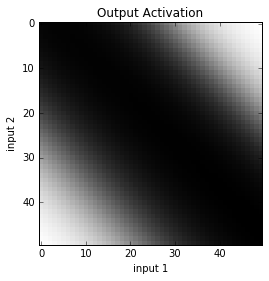

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

res = 50 # resolution
z = np.zeros((res, res))

for x in range(res):
    for y in range(res):
        z[x][y] = net.propagate([x/res, y/res])

plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Output Activation")

plt.show()

# Handwriting Categorization

First, I'll use the metakernel's %download magic to get the MNIST hand written data:

In [140]:
! pip install metakernel --user -U

Requirement already up-to-date: metakernel in /home/dblank/.local/lib/python3.4/site-packages
Requirement already up-to-date: IPython>=3.0 in /usr/local/lib/python3.4/dist-packages (from metakernel)
Requirement already up-to-date: prompt-toolkit<2.0.0,>=1.0.3 in /usr/local/lib/python3.4/dist-packages (from IPython>=3.0->metakernel)
Requirement already up-to-date: pygments in /usr/local/lib/python3.4/dist-packages (from IPython>=3.0->metakernel)
Requirement already up-to-date: pickleshare in /usr/local/lib/python3.4/dist-packages (from IPython>=3.0->metakernel)
Requirement already up-to-date: simplegeneric>0.8 in /usr/lib/python3/dist-packages (from IPython>=3.0->metakernel)
Requirement already up-to-date: traitlets>=4.2 in /usr/local/lib/python3.4/dist-packages (from IPython>=3.0->metakernel)
Requirement already up-to-date: setuptools>=18.5 in /usr/local/lib/python3.4/dist-packages (from IPython>=3.0->metakernel)
Requirement already up-to-date: pexpect; sys_platform != "win32" in /usr/

In [141]:
import metakernel

In [142]:
metakernel.register_ipython_magics()

In [42]:
%download http://deeplearning.net/data/mnist/mnist.pkl.gz

Downloaded 'mnist.pkl.gz'.


Unzip the file:

In [43]:
!gunzip mnist.pkl.gz

From http://deeplearning.net/tutorial/gettingstarted.html we see that:

> The pickled file represents a tuple of 3 lists: the training set, the validation set and the testing set. Each of the three lists is a pair formed from a list of images and a list of class labels for each of the images. An image is represented as numpy 1-dimensional array of 784 (28 x 28) float values between 0 and 1 (0 stands for black, 1 for white). The labels are numbers between 0 and 9 indicating which digit the image represents.

We read the Python2 pickled data:

In [13]:
import pickle
import gzip
import numpy

with open('mnist.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    data = u.load()
    train_set, validation_set, test_set = data

In [14]:
len(train_set)

2

In [15]:
len(train_set[0])

50000

In [16]:
len(train_set[0][0])

784

In [31]:
net = Network(784, 100, 1)

In [32]:
inputs = [train_set[0][i] for i in range(len(train_set[0]))]
targets = [[train_set[1][i]/9.0] for i in range(len(train_set[0]))]

inputs = inputs[:100]
targets = targets[:100]

In [35]:
def display_digit(vector):
    for r in range(28):
        for c in range(28):
            v = int(vector[r * 28 + c] * 10)
            ch = " .23456789"[v]
            print(ch, end="")
        print()
        
net.display_test_input = display_digit
net.set_inputs(list(zip(inputs, targets)))

In [36]:
net.test(stop=2)

--------------------------------------------------
Test:
                            
                            
                            
                            
                            
                456.6994    
        ..36699999869972    
       .99999999993332.     
        8999997799          
        364998  .6          
           693              
           597              
            792             
            .9864           
             39994          
              .7995.        
                3997        
                 9992       
              .57998        
            .5899997        
           48999973         
         28999973           
       68999973             
    268999995               
    5999855                 
                            
                            
                            
Output: [ 0.99891001]

                            
                            
                            
                     

In [37]:
net.train(report_rate=10, tolerance=0.05)

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 34.5930858635 %correct: 0.11
Epoch: 10 TSS error: 1.32377985833 %correct: 0.36
Epoch: 20 TSS error: 0.411839130644 %correct: 0.79
Epoch: 30 TSS error: 0.267324372292 %correct: 0.84
Epoch: 40 TSS error: 0.107195924523 %correct: 0.88
Epoch: 50 TSS error: 0.0650005585999 %correct: 0.94
Epoch: 60 TSS error: 0.0493717431555 %correct: 0.97
Epoch: 70 TSS error: 0.043711557982 %correct: 0.97
Epoch: 80 TSS error: 0.0405500514493 %correct: 0.97
Epoch: 90 TSS error: 0.0366644043236 %correct: 0.97
Epoch: 100 TSS error: 0.034313203966 %correct: 0.97
Epoch: 110 TSS error: 0.0318499688892 %correct: 0.97
Epoch: 120 TSS error: 0.0299062687577 %correct: 0.97
Epoch: 130 TSS error: 0.0275353365237 %correct: 0.97
Epoch: 140 TSS error: 0.0255731117788 %correct: 0.98
Epoch: 150 TSS error: 0.0237657265998 %correct: 0.98
Epoch: 160 TSS error: 0.0217853045717 %correct: 0.98
Epoch: 170 TSS error: 0.0205203533

In [38]:
net.test(stop=2)

--------------------------------------------------
Test:
                            
                            
                            
                            
              594           
            .6996           
            69994           
           .8994            
           89992            
          .9997             
          4997              
          698     55.       
          894   27998       
         4992   69999       
         698   699759       
         996   798.39       
         993  .982 79       
         997  795 498       
         89922995598.       
         69998999994        
         .899999994         
          .589964           
            .892            
             77             
                            
                            
                            
                            
Output: [ 0.66869171]

                            
                            
                            
                     

In [39]:
for i in range(100):
    output = net.propagate(inputs[i])
    target = int(targets[i][0] * 9)
    print("target:", target, "output:", output, "correct?", int(output * 10) == target)

target: 5 output: [ 0.5584583] correct? True
target: 0 output: [ 0.0008485] correct? True
target: 4 output: [ 0.44625995] correct? True
target: 1 output: [ 0.11636889] correct? True
target: 9 output: [ 0.98132617] correct? True
target: 2 output: [ 0.22265295] correct? True
target: 1 output: [ 0.11216834] correct? True
target: 3 output: [ 0.33391114] correct? True
target: 1 output: [ 0.11049537] correct? True
target: 4 output: [ 0.44476502] correct? True
target: 3 output: [ 0.33293912] correct? True
target: 5 output: [ 0.5550864] correct? True
target: 3 output: [ 0.33548028] correct? True
target: 6 output: [ 0.66781011] correct? True
target: 1 output: [ 0.11115588] correct? True
target: 7 output: [ 0.77782846] correct? True
target: 2 output: [ 0.22327943] correct? True
target: 8 output: [ 0.90372405] correct? False
target: 6 output: [ 0.6682901] correct? True
target: 9 output: [ 0.99286186] correct? True
target: 4 output: [ 0.44585381] correct? True
target: 0 output: [ 0.01176537] corre

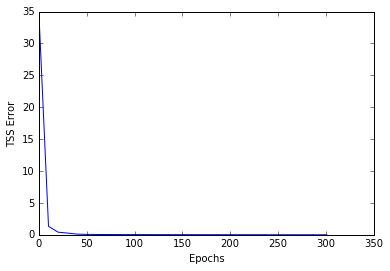

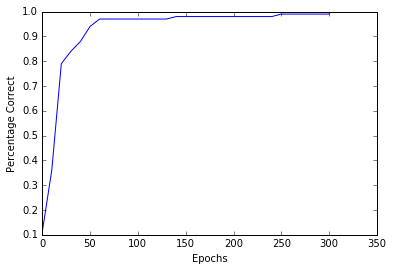

In [40]:
h = net.get_history()
epochs = [x[0] for x in h]
tss = [x[1] for x in h]
percent = [x[2] for x in h]

import matplotlib.pyplot as plt

plt.plot(epochs, tss)
plt.xlabel("Epochs")
plt.ylabel("TSS Error")
plt.show()
plt.plot(epochs, percent)
plt.xlabel("Epochs")
plt.ylabel("Percentage Correct")
plt.show()

<h1>References</h1>

1. http://outlace.com/Beginner-Tutorial-Theano/
2. http://deeplearning.net/software/theano/tutorial/adding.html
